<a href="https://colab.research.google.com/github/Subhash-K45/python/blob/main/Turbine/Tubine_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import Callback
import time
from sklearn.linear_model import HuberRegressor

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
data = pd.read_csv('/content/turbine-preprocessed.zip')

In [ ]:
data.columns

Index(['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'ControlBoxTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature',
       'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WindDirection', 'WindSpeed', 'Date and Time', 'WTG', 'Time', 'Date'],
      dtype='object')

In [ ]:
def calculate_f():
    return 0.5
def calculate_g(row):
    wind_speed = row['WindSpeed']
    active_power = row['ActivePower']
    rotor_rpm = row['RotorRPM']
    b1_pitch_angle = row['Blade1PitchAngle']
    b2_pitch_angle = row['Blade2PitchAngle']
    b3_pitch_angle = row['Blade3PitchAngle']

    return 0.01 * wind_speed**1.5 + 0.002 * active_power + 0.0005 * rotor_rpm**2 + b1_pitch_angle * 0.2 + b2_pitch_angle * 0.1 + b3_pitch_angle * 0.3

def calculate_h(time):
    return 1 + time/1000

data['Time'].fillna(0, inplace=True)
data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
data['CorrosionRate'] = data.apply(lambda row: calculate_f() * calculate_g(row) * calculate_h(row['Time']), axis=1)
nan_rows_corrosion_rate = data[data['CorrosionRate'].isna()]
print("Rows with NaN values in 'CorrosionRate' column:")
print(nan_rows_corrosion_rate)
nan_rows_date_time = data[data['Date and Time'].isna()]
print("Rows with NaN values in 'Date and Time' column:")
print(nan_rows_date_time)
for i in range(1, 13):
    if(i<10):
      month_data = data[data['Date and Time'].astype(str).str.contains(f'2019-0{i}')]
    else:
      month_data = data[data['Date and Time'].astype(str).str.contains(f'2019-{i}')]
    nan_rows_month = month_data[month_data['CorrosionRate'].isna()]

    if not nan_rows_month.empty:
        print(f"NaN values found for the month 2019-0{i} in 'CorrosionRate' column.")
    else:
        mean_value = month_data['CorrosionRate'].mean()
        print(f"Mean CorrosionRate for the month 2019-{i}: {mean_value}")


Rows with NaN values in 'CorrosionRate' column:
Empty DataFrame
Columns: [ActivePower, AmbientTemperatue, BearingShaftTemperature, Blade1PitchAngle, Blade2PitchAngle, Blade3PitchAngle, ControlBoxTemperature, GearboxBearingTemperature, GearboxOilTemperature, GeneratorRPM, GeneratorWinding1Temperature, GeneratorWinding2Temperature, HubTemperature, MainBoxTemperature, NacellePosition, ReactivePower, RotorRPM, TurbineStatus, WindDirection, WindSpeed, Date and Time, WTG, Time, Date, CorrosionRate]
Index: []

[0 rows x 25 columns]
Rows with NaN values in 'Date and Time' column:
Empty DataFrame
Columns: [ActivePower, AmbientTemperatue, BearingShaftTemperature, Blade1PitchAngle, Blade2PitchAngle, Blade3PitchAngle, ControlBoxTemperature, GearboxBearingTemperature, GearboxOilTemperature, GeneratorRPM, GeneratorWinding1Temperature, GeneratorWinding2Temperature, HubTemperature, MainBoxTemperature, NacellePosition, ReactivePower, RotorRPM, TurbineStatus, WindDirection, WindSpeed, Date and Time, WTG

In [ ]:
res = {}
x = data[['CorrosionRate','Date and Time']]
for i in range(1,13):
  if(i<=9):
     res[f'2019-{i}'] = x[x['Date and Time'].astype(str).str.contains(f'2019-0{i}')]['CorrosionRate'].mean()
  else:
    res[f'2019-{i}'] = x[x['Date and Time'].astype(str).str.contains(f'2019-{i}')]['CorrosionRate'].mean()

In [ ]:
res

{'2019-1': 3.5225786372944627,
 '2019-2': 3.520576718627696,
 '2019-3': 3.4724407749150505,
 '2019-4': 3.4330188126650505,
 '2019-5': 4.161085154218293,
 '2019-6': 3.1914371832902355,
 '2019-7': 2.9677611466840377,
 '2019-8': 2.9366328019299646,
 '2019-9': 4.38262933769854,
 '2019-10': 4.8418869403928175,
 '2019-11': 4.112248625159076,
 '2019-12': 5.379337576777926}

In [ ]:
for i in range(1,13):
  if pd.isna(x[x['Date and Time'].astype(str).str.contains(f'2020-0{i}')]['CorrosionRate'].mean()):
    break
  if(i<=9):
     res[f'2020-{i}'] = x[x['Date and Time'].astype(str).str.contains(f'2020-0{i}')]['CorrosionRate'].mean()
  else:
    res[f'2020-{i}'] = x[x['Date and Time'].astype(str).str.contains(f'2020-{i}')]['CorrosionRate'].mean()

In [ ]:
res

{'2019-1': 3.5225786372944627,
 '2019-2': 3.520576718627696,
 '2019-3': 3.4724407749150505,
 '2019-4': 3.4330188126650505,
 '2019-5': 4.161085154218293,
 '2019-6': 3.1914371832902355,
 '2019-7': 2.9677611466840377,
 '2019-8': 2.9366328019299646,
 '2019-9': 4.38262933769854,
 '2019-10': 4.8418869403928175,
 '2019-11': 4.112248625159076,
 '2019-12': 5.379337576777926,
 '2020-1': 2.945292781758729,
 '2020-2': 2.500402378378692,
 '2020-3': 3.873651588530516}

In [ ]:
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

mean_corrosion_rate = {
    '2019-1': 3.5225786372944627,
    '2019-2': 3.520576718627696,
    '2019-3': 3.4724407749150505,
    '2019-4': 3.4330188126650505,
    '2019-5': 4.161085154218293,
    '2019-6': 3.1914371832902355,
    '2019-7': 2.9677611466840377,
    '2019-8': 2.9366328019299646,
    '2019-9': 4.38262933769854,
    '2019-10': 4.8418869403928175,
    '2019-11': 4.112248625159076,
    '2019-12': 5.379337576777926,
    '2020-1': 2.945292781758729,
    '2020-2': 2.500402378378692,
    '2020-3': 3.873651588530516
}

# Convert numeric month to month name in the dictionary keys
mean_corrosion_rate_month_name = {f'{key.split("-")[0]}-{month_mapping[int(key.split("-")[1])]}': value for key, value in mean_corrosion_rate.items()}
df_cr = pd.DataFrame(list(mean_corrosion_rate_month_name.items()), columns=['Date', 'Corrision Rate'])
df_cr


,Date,Corrision Rate
0,2019-Jan,3.522579
1,2019-Feb,3.520577
2,2019-Mar,3.472441
3,2019-Apr,3.433019
4,2019-May,4.161085
5,2019-Jun,3.191437
6,2019-Jul,2.967761
7,2019-Aug,2.936633
8,2019-Sep,4.382629
9,2019-Oct,4.841887


In [ ]:
print(x[x['Date and Time'].astype(str).str.contains(f'2020-03')]['CorrosionRate'].mean())

3.873651588530516


In [ ]:
data.columns

Index(['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'ControlBoxTemperature', 'GearboxBearingTemperature',
       'GearboxOilTemperature', 'GeneratorRPM', 'GeneratorWinding1Temperature',
       'GeneratorWinding2Temperature', 'HubTemperature', 'MainBoxTemperature',
       'NacellePosition', 'ReactivePower', 'RotorRPM', 'TurbineStatus',
       'WindDirection', 'WindSpeed', 'Date and Time', 'WTG', 'Time', 'Date',
       'CorrosionRate'],
      dtype='object')

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
target_variable = 'CorrosionRate'

features = data[numeric_columns].drop(columns=[target_variable])
labels = data[target_variable]

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

model = Sequential([
    Dense(64, activation='relu', input_shape=(train_features.shape[1],)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
start_time = time.time()
history = model.fit(train_features_scaled, train_labels, epochs=10, validation_split=0.2)
end_time = time.time()

test_loss = model.evaluate(test_features_scaled, test_labels)
print(f'Test Loss: {test_loss}')

new_data_features = test_features_scaled[:5]
new_data_predictions = model.predict(new_data_features)

computational_time = end_time - start_time

# Display predictions
print("New Data Predictions:")
print(new_data_predictions)


Epoch 1/10
1311/1311 [==============================] - 5s 3ms/step - loss: 2.1919 - val_loss: 0.0652
Epoch 2/10
1311/1311 [==============================] - 4s 3ms/step - loss: 0.0184 - val_loss: 1.5742
Epoch 3/10
1311/1311 [==============================] - 5s 3ms/step - loss: 0.0068 - val_loss: 2.9707
Epoch 4/10
1311/1311 [==============================] - 7s 5ms/step - loss: 0.0037 - val_loss: 3.6215
Epoch 5/10
1311/1311 [==============================] - 6s 4ms/step - loss: 0.0023 - val_loss: 3.1783
Epoch 6/10
1311/1311 [==============================] - 9s 7ms/step - loss: 0.0017 - val_loss: 1.7405
Epoch 7/10
1311/1311 [==============================] - 8s 6ms/step - loss: 0.0013 - val_loss: 1.3732
Epoch 8/10
1311/1311 [==============================] - 10s 8ms/step - loss: 0.0010 - val_loss: 0.4576
Epoch 9/10
1311/1311 [==============================] - 5s 4ms/step - loss: 9.8372e-04 - val_loss: 0.2994
Epoch 10/10
410/410 [==============================] - 1s 2ms/step - loss: 0.

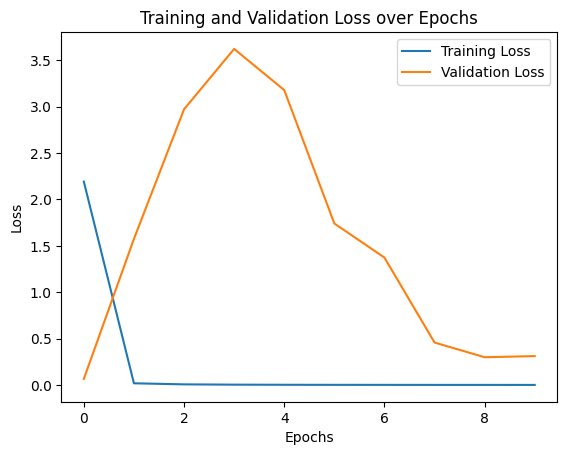

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
history.history

{'loss': [2.1918740272521973,
  0.018384937196969986,
  0.006834650877863169,
  0.003677968168631196,
  0.002334355376660824,
  0.0017246409552171826,
  0.001305164652876556,
  0.0010229984764009714,
  0.000983716337941587,
  0.0007919619092717767],
 'val_loss': [0.06521190702915192,
  1.5742071866989136,
  2.970724582672119,
  3.621547222137451,
  3.1782898902893066,
  1.740532636642456,
  1.373201608657837,
  0.4575529396533966,
  0.29940637946128845,
  0.31127265095710754]}

In [ ]:
test_predictions = model.predict(test_features_scaled)
mae = mean_absolute_error(test_labels, test_predictions)
rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
r2 = r2_score(test_labels, test_predictions)
mse = mean_squared_error(test_labels, test_predictions)
test_loss = model.evaluate(test_features_scaled, test_labels)
print(f'Test Loss: {test_loss}')

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Computational Time: {computational_time} seconds')


410/410 [==============================] - 1s 2ms/step - loss: 0.1803
Test Loss: 0.1803320199251175
Mean Absolute Error (MAE): 0.016747239432749493
Root Mean Squared Error (RMSE): 0.424655255700116
R-squared (R2): 0.9918169526635389
Mean Squared Error (MSE): 0.18033208619373087
Computational Time: 83.2903254032135 seconds


In [ ]:
huber_regressor = HuberRegressor()
start_time = time.time()
huber_regressor.fit(train_features, train_labels)
end_time = time.time()

huber_test_predictions = huber_regressor.predict(test_features)


mae_huber = mean_absolute_error(test_labels, huber_test_predictions)
rmse_huber = np.sqrt(mean_squared_error(test_labels, huber_test_predictions))
r2_huber = r2_score(test_labels, huber_test_predictions)
mse_huber = mean_squared_error(test_labels, huber_test_predictions)
computational_time = end_time - start_time

print(f'Huber Regressor - Mean Absolute Error (MAE): {mae_huber}')
print(f'Huber Regressor - Root Mean Squared Error (RMSE): {rmse_huber}')
print(f'Huber Regressor - R-squared (R2): {r2_huber}')
print(f'Huber Regressor - Mean Squared Error (MSE): {mse_huber}')
print(f'Computational Time: {computational_time} seconds')

Huber Regressor - Mean Absolute Error (MAE): 0.07433098305198498
Huber Regressor - Root Mean Squared Error (RMSE): 0.10979631584683941
Huber Regressor - R-squared (R2): 0.999452961878329
Huber Regressor - Mean Squared Error (MSE): 0.012055230973538918
Computational Time: 2.0145626068115234 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
delta = huber_regressor.epsilon  # Get the value of the HuberRegressor's epsilon parameter

def huber_loss(y_true, y_pred, delta):
    residual = np.abs(y_true - y_pred)
    loss = np.where(residual <= delta, 0.5 * (residual ** 2), delta * (residual - 0.5 * delta))
    return np.mean(loss)

# Calculate Huber loss
test_loss_huber = huber_loss(test_labels, huber_test_predictions, delta)
print(f'Huber Regressor - Huber Loss: {test_loss_huber}')


Huber Regressor - Huber Loss: 0.006027615486769459


In [ ]:
from sklearn.linear_model import ARDRegression
import time

# Assuming 'train_features', 'train_labels', 'test_features', and 'test_labels' are already defined

# Create and train the ARD Regressor model
start_time_ard = time.time()
ard_regressor = ARDRegression()
ard_regressor.fit(train_features, train_labels)
end_time_ard = time.time()

# Measure computational time for ARD Regressor
computational_time_ard = end_time_ard - start_time_ard

# Make predictions on the test set using ARD Regressor
ard_test_predictions = ard_regressor.predict(test_features)

# Calculate regression metrics for ARD Regressor
mae_ard = mean_absolute_error(test_labels, ard_test_predictions)
rmse_ard = np.sqrt(mean_squared_error(test_labels, ard_test_predictions))
r2_ard = r2_score(test_labels, ard_test_predictions)
mse_ard = mean_squared_error(test_labels, ard_test_predictions)

# Display the metrics and computational time for ARD Regressor
print(f'ARD Regressor - Mean Absolute Error (MAE): {mae_ard}')
print(f'ARD Regressor - Root Mean Squared Error (RMSE): {rmse_ard}')
print(f'ARD Regressor - R-squared (R2): {r2_ard}')
print(f'ARD Regressor - Mean Squared Error (MSE): {mse_ard}')
print(f'ARD Regressor - Computational Time: {computational_time_ard} seconds')


ARD Regressor - Mean Absolute Error (MAE): 0.1369086842936966
ARD Regressor - Root Mean Squared Error (RMSE): 0.190814692114148
ARD Regressor - R-squared (R2): 0.9983477883565542
ARD Regressor - Mean Squared Error (MSE): 0.03641024672661709
ARD Regressor - Computational Time: 0.08101558685302734 seconds


In [ ]:
class MetricsCallback(Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.metrics_per_epoch = []

    def on_epoch_end(self, epoch, logs=None):
        test_features_scaled, test_labels = self.test_data
        test_predictions = self.model.predict(test_features_scaled)

        mae = mean_absolute_error(test_labels, test_predictions)
        rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
        r2 = r2_score(test_labels, test_predictions)
        mse = mean_squared_error(test_labels, test_predictions)
        loss = logs['loss']

        epoch_metrics = {
            'Epoch': epoch,
            'MAE': mae,
            'RMSE': rmse,
            'R²': r2,
            'MSE': mse,
            'Loss': loss
        }

        self.metrics_per_epoch.append(epoch_metrics)

# Create the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(train_features.shape[1],)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with the custom callback
metrics_callback = MetricsCallback(test_data=(test_features_scaled, test_labels))
start_time = time.time()
model.fit(train_features_scaled, train_labels, epochs=10, validation_split=0.2, callbacks=[metrics_callback])
end_time = time.time()

# Evaluate the model on the test set
test_loss = model.evaluate(test_features_scaled, test_labels)
print(f'Test Loss: {test_loss}')

# Make predictions on new data (using part of the testing set as an example)
new_data_features = test_features_scaled[:5]
new_data_predictions = model.predict(new_data_features)

computational_time = end_time - start_time

# Display predictions
print("New Data Predictions:")
print(new_data_predictions)

# Display metrics for each epoch
epoch_metrics_df = pd.DataFrame(metrics_callback.metrics_per_epoch)
epoch_metrics_df.to_csv('epoch_metrics.csv', index=False)


Epoch 1/10
1311/1311 [==============================] - 5s 3ms/step - loss: 1.8273 - val_loss: 1.3984
Epoch 2/10
1311/1311 [==============================] - 4s 3ms/step - loss: 0.0188 - val_loss: 0.0212
Epoch 3/10
1311/1311 [==============================] - 3s 3ms/step - loss: 0.0064 - val_loss: 0.7984
Epoch 4/10
1311/1311 [==============================] - 9s 7ms/step - loss: 0.0034 - val_loss: 0.8869
Epoch 5/10
1311/1311 [==============================] - 4s 3ms/step - loss: 0.0022 - val_loss: 0.5989
Epoch 6/10
1311/1311 [==============================] - 3s 3ms/step - loss: 0.0016 - val_loss: 0.2141
Epoch 7/10
1311/1311 [==============================] - 4s 3ms/step - loss: 0.0013 - val_loss: 0.0610
Epoch 8/10
1311/1311 [==============================] - 4s 3ms/step - loss: 9.9217e-04 - val_loss: 0.0188
Epoch 9/10
1311/1311 [==============================] - 3s 3ms/step - loss: 8.2818e-04 - val_loss: 0.0150
Epoch 10/10
410/410 [==============================] - 1s 1ms/step - loss:

In [ ]:
pd.read_csv('epoch_metrics.csv')

,Epoch,MAE,RMSE,R²,MSE,Loss
0,0,0.140921,0.999183,0.954696,0.998367,1.827301
1,1,0.070728,0.128488,0.999251,0.016509,0.018835
2,2,0.054668,0.738410,0.975258,0.545250,0.006429
3,3,0.041763,0.776667,0.972628,0.603211,0.003367
4,4,0.046454,0.628777,0.982059,0.395361,0.002197
5,5,0.039629,0.361169,0.994081,0.130443,0.001631
6,6,0.027337,0.176607,0.998585,0.031190,0.001336
7,7,0.018205,0.086417,0.999661,0.007468,0.000992
8,8,0.019132,0.132653,0.999201,0.017597,0.000828
9,9,0.021611,0.218297,0.997838,0.047654,0.000800


In [ ]:
data.drop(['Time','ControlBoxTemperature'],axis=1,inplace=True)

<ipython-input-25-7080bfaa4421>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='viridis')


<Axes: >

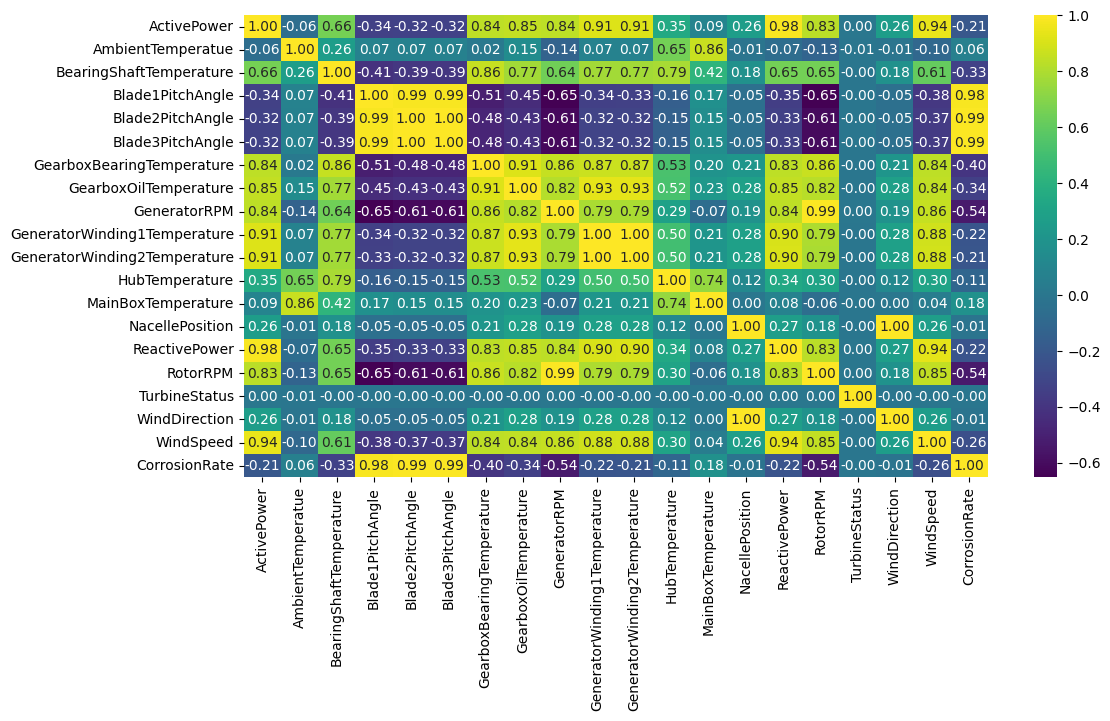

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='viridis')

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
target_variable = 'ActivePower'  # Replace with the actual column name for power output

features = data[numeric_columns].drop(columns=[target_variable])
labels = data[target_variable]

In [ ]:
features.drop(['AmbientTemperatue','MainBoxTemperature','NacellePosition','WindDirection','TurbineStatus','CorrosionRate'],axis=1,inplace=True)

In [ ]:
features

,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,ReactivePower,RotorRPM,WindSpeed
0,39.723162,8.783161,10.026366,10.026366,65.525475,55.783261,1140.444030,59.083895,58.330023,29.275023,-0.558813,10.231713,6.057610
1,39.593168,8.731178,10.026366,10.026366,65.525652,55.931193,1113.333950,58.664207,57.917016,29.004748,-0.190576,9.987514,6.112440
2,39.413213,8.747669,10.026366,10.026366,65.359961,55.848357,1112.593940,58.091497,57.346330,29.001907,-0.489148,9.974075,6.138910
3,39.297822,8.818073,10.026366,10.026366,65.412953,55.945489,1111.127140,57.740270,57.004632,29.001907,-0.346443,9.964816,5.917395
4,39.186556,8.764398,10.026366,10.026366,65.621036,55.918306,1138.942370,57.560538,56.825628,29.001907,-0.153802,10.208557,5.971805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65515,45.711129,1.515669,1.950088,1.950088,59.821165,55.193793,1029.870744,59.060367,58.148777,39.008931,13.775785,9.234004,3.533445
65516,45.598573,1.702809,2.136732,2.136732,59.142038,54.798545,1030.160478,58.452003,57.550367,39.006759,8.088928,9.229370,3.261231
65517,45.462045,1.706214,2.139664,2.139664,58.439439,54.380456,1030.137822,58.034071,57.099335,39.003815,4.355978,9.236802,3.331839
65518,45.343827,1.575352,2.009781,2.009781,58.205413,54.079014,1030.178178,57.795387,56.847239,39.003815,12.018077,9.237374,3.284468


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features,labels,random_state = 42,test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((52416, 13), (13104, 13), (52416,), (13104,))

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
1311/1311 [==============================] - 4s 2ms/step - loss: 84513.2578 - val_loss: 6591.9214
Epoch 2/50
1311/1311 [==============================] - 4s 3ms/step - loss: 4884.7554 - val_loss: 4197.2373
Epoch 3/50
1311/1311 [==============================] - 6s 4ms/step - loss: 3276.9722 - val_loss: 2999.8364
Epoch 4/50
1311/1311 [==============================] - 4s 3ms/step - loss: 2369.0488 - val_loss: 2270.0642
Epoch 5/50
1311/1311 [==============================] - 3s 2ms/step - loss: 1824.7759 - val_loss: 1798.3173
Epoch 6/50
1311/1311 [==============================] - 5s 4ms/step - loss: 1535.7473 - val_loss: 1670.3676
Epoch 7/50
1311/1311 [==============================] - 5s 4ms/step - loss: 1383.2921 - val_loss: 1450.3087
Epoch 8/50
1311/1311 [==============================] - 6s 5ms/step - loss: 1261.6143 - val_loss: 1350.6510
Epoch 9/50
1311/1311 [==============================] - 6s 4ms/step - loss: 1231.8340 - val_loss: 1681.2053
Epoch 10/50
1311/1311 [====

In [ ]:
test_predictions = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
r2 = r2_score(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
test_loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Computational Time: {computational_time} seconds')

410/410 [==============================] - 1s 1ms/step - loss: 711.8372
Test Loss: 711.837158203125
Mean Absolute Error (MAE): 13.38293677241071
Root Mean Squared Error (RMSE): 26.68027376608237
R-squared (R2): 0.9978666745958118
Mean Squared Error (MSE): 711.837008233103
Computational Time: 43.35312461853027 seconds


In [ ]:
history.history

{'loss': [84513.2578125,
  4884.75537109375,
  3276.97216796875,
  2369.048828125,
  1824.77587890625,
  1535.747314453125,
  1383.2921142578125,
  1261.6142578125,
  1231.833984375,
  1153.1171875,
  1103.718505859375,
  1062.4420166015625,
  1025.251220703125,
  969.1524658203125,
  909.9771728515625,
  881.5009765625,
  825.848876953125,
  770.0625,
  740.0025024414062,
  718.3400268554688,
  685.9985961914062,
  670.2872314453125,
  648.0087890625,
  616.3658447265625,
  596.2428588867188,
  571.8998413085938,
  552.2305297851562,
  542.3968505859375,
  527.8663330078125,
  528.4382934570312,
  492.9162902832031,
  500.30859375,
  479.5086669921875,
  474.656982421875,
  474.4093322753906,
  466.4986267089844,
  461.9698181152344,
  448.16583251953125,
  450.3766174316406,
  438.4259338378906,
  417.50811767578125,
  425.8758544921875,
  422.2518005371094,
  414.2897033691406,
  399.5142822265625,
  429.08734130859375,
  403.2362365722656,
  397.4715881347656,
  393.051025390625,
 

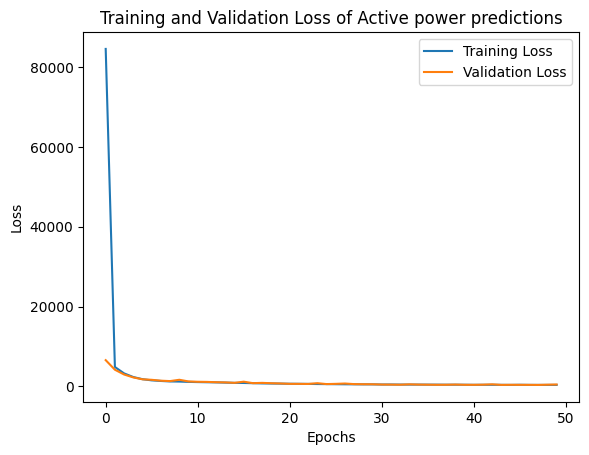

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss of Active power predictions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

In [ ]:
X_test

,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,ReactivePower,RotorRPM,WindSpeed
64171,46.830377,6.340287,6.889663,6.889663,74.461711,62.779404,1756.349870,94.025539,93.433798,42.996561,-48.286058,15.751304,9.919983
35316,48.716727,7.699658,8.156943,8.156943,80.576892,68.485353,1753.822789,116.589549,116.021977,39.996185,348.559299,15.720619,10.768064
15736,42.848764,13.866670,10.026366,10.026366,57.253805,53.566526,68.182068,54.643034,54.137993,41.006906,-11.018405,0.515928,2.466890
48571,44.878015,2.174297,2.396502,2.396502,72.953517,60.966667,1703.394830,99.864954,99.324523,32.996185,321.870681,15.276100,8.723968
52241,46.058537,-1.100050,-0.609683,-0.609683,66.950440,54.583627,1511.828070,83.780845,83.313008,33.018361,228.451547,13.564468,7.658220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,45.326894,7.992015,10.026366,10.026366,71.383243,60.591683,1437.163780,75.390103,74.849256,37.996185,197.628291,12.887233,7.123295
52452,40.050261,-0.655544,-0.089395,-0.089395,63.096074,55.916441,1071.426862,58.496291,57.773077,30.998093,66.264550,9.611250,5.196305
56824,40.355754,-1.011044,-0.472746,-0.472746,56.207478,52.361668,1088.232640,58.765123,57.785670,35.096988,97.887971,3.218267,5.828244
953,40.927880,8.138471,10.026366,10.026366,67.992751,57.951789,1246.948180,66.589649,65.847465,34.004657,122.637928,11.176417,6.837881


In [ ]:
for i in X_test.columns:
  print(X_test)

       BearingShaftTemperature  Blade1PitchAngle  Blade2PitchAngle  \
64171                46.830377          6.340287          6.889663   
35316                48.716727          7.699658          8.156943   
15736                42.848764         13.866670         10.026366   
48571                44.878015          2.174297          2.396502   
52241                46.058537         -1.100050         -0.609683   
...                        ...               ...               ...   
10689                45.326894          7.992015         10.026366   
52452                40.050261         -0.655544         -0.089395   
56824                40.355754         -1.011044         -0.472746   
953                  40.927880          8.138471         10.026366   
5562                 42.116249         13.386744         10.026366   

       Blade3PitchAngle  GearboxBearingTemperature  GearboxOilTemperature  \
64171          6.889663                  74.461711              62.779404   
35316

In [ ]:
test_predictions

array([[1770.8052   ],
       [1743.3425   ],
       [  -3.9169362],
       ...,
       [ 487.80267  ],
       [ 609.58093  ],
       [  -3.6150355]], dtype=float32)

In [ ]:
X_test

,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,ReactivePower,RotorRPM,WindSpeed
64171,46.830377,6.340287,6.889663,6.889663,74.461711,62.779404,1756.349870,94.025539,93.433798,42.996561,-48.286058,15.751304,9.919983
35316,48.716727,7.699658,8.156943,8.156943,80.576892,68.485353,1753.822789,116.589549,116.021977,39.996185,348.559299,15.720619,10.768064
15736,42.848764,13.866670,10.026366,10.026366,57.253805,53.566526,68.182068,54.643034,54.137993,41.006906,-11.018405,0.515928,2.466890
48571,44.878015,2.174297,2.396502,2.396502,72.953517,60.966667,1703.394830,99.864954,99.324523,32.996185,321.870681,15.276100,8.723968
52241,46.058537,-1.100050,-0.609683,-0.609683,66.950440,54.583627,1511.828070,83.780845,83.313008,33.018361,228.451547,13.564468,7.658220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,45.326894,7.992015,10.026366,10.026366,71.383243,60.591683,1437.163780,75.390103,74.849256,37.996185,197.628291,12.887233,7.123295
52452,40.050261,-0.655544,-0.089395,-0.089395,63.096074,55.916441,1071.426862,58.496291,57.773077,30.998093,66.264550,9.611250,5.196305
56824,40.355754,-1.011044,-0.472746,-0.472746,56.207478,52.361668,1088.232640,58.765123,57.785670,35.096988,97.887971,3.218267,5.828244
953,40.927880,8.138471,10.026366,10.026366,67.992751,57.951789,1246.948180,66.589649,65.847465,34.004657,122.637928,11.176417,6.837881


In [ ]:
dates = data['Date']
new_df = pd.concat([dates.loc[X_test.index], X_test], axis=1)
new_df

,Date,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,ReactivePower,RotorRPM,WindSpeed
64171,2020-03-21,46.830377,6.340287,6.889663,6.889663,74.461711,62.779404,1756.349870,94.025539,93.433798,42.996561,-48.286058,15.751304,9.919983
35316,2019-09-03,48.716727,7.699658,8.156943,8.156943,80.576892,68.485353,1753.822789,116.589549,116.021977,39.996185,348.559299,15.720619,10.768064
15736,2019-04-20,42.848764,13.866670,10.026366,10.026366,57.253805,53.566526,68.182068,54.643034,54.137993,41.006906,-11.018405,0.515928,2.466890
48571,2019-12-04,44.878015,2.174297,2.396502,2.396502,72.953517,60.966667,1703.394830,99.864954,99.324523,32.996185,321.870681,15.276100,8.723968
52241,2019-12-29,46.058537,-1.100050,-0.609683,-0.609683,66.950440,54.583627,1511.828070,83.780845,83.313008,33.018361,228.451547,13.564468,7.658220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,2019-03-16,45.326894,7.992015,10.026366,10.026366,71.383243,60.591683,1437.163780,75.390103,74.849256,37.996185,197.628291,12.887233,7.123295
52452,2019-12-31,40.050261,-0.655544,-0.089395,-0.089395,63.096074,55.916441,1071.426862,58.496291,57.773077,30.998093,66.264550,9.611250,5.196305
56824,2020-01-30,40.355754,-1.011044,-0.472746,-0.472746,56.207478,52.361668,1088.232640,58.765123,57.785670,35.096988,97.887971,3.218267,5.828244
953,2019-01-07,40.927880,8.138471,10.026366,10.026366,67.992751,57.951789,1246.948180,66.589649,65.847465,34.004657,122.637928,11.176417,6.837881


In [ ]:
new_df['active_power'] = test_predictions

In [ ]:
dict_res = {}
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

In [ ]:
dict_res = {}
for i in range(1,13):
  dict_res[f'2019-{i:02d}'] = new_df[new_df['Date'].astype(str).str.contains(f'2019-{i:02d}')]['active_power'].mean()
dict_res

{'2019-01': 485.14853,
 '2019-02': 509.85272,
 '2019-03': 459.38965,
 '2019-04': 301.6954,
 '2019-05': 569.701,
 '2019-06': 957.0516,
 '2019-07': 1293.2893,
 '2019-08': 1270.5732,
 '2019-09': 760.33276,
 '2019-10': 377.8909,
 '2019-11': 267.70688,
 '2019-12': 424.0959}

In [ ]:
dict_res = {f'{key.split("-")[0]}-{month_mapping[int(key.split("-")[1])]}': value for key, value in dict_res.items()}
df_2019_ap = pd.DataFrame(list(dict_res.items()), columns=['Date', 'Active Power'])
df_2019_ap

,Date,Active Power
0,2019-Jan,485.148529
1,2019-Feb,509.852722
2,2019-Mar,459.389648
3,2019-Apr,301.695404
4,2019-May,569.700989
5,2019-Jun,957.051575
6,2019-Jul,1293.289307
7,2019-Aug,1270.573242
8,2019-Sep,760.332764
9,2019-Oct,377.890900


In [ ]:
dict_res_2020 = {}
for i in range(1,4):
  dict_res_2020[f'2020-{i:02d}'] = new_df[new_df['Date'].astype(str).str.contains(f'2020-{i:02d}')]['active_power'].mean()
dict_res_2020

{'2020-01': 503.05637, '2020-02': 578.408, '2020-03': 482.8228}

In [ ]:
dict_res_2020 = {f'{key.split("-")[0]}-{month_mapping[int(key.split("-")[1])]}': value for key, value in dict_res_2020.items()}
df_2020_ap = pd.DataFrame(list(dict_res_2020.items()), columns=['Date', 'Active Power'])
df_2020_ap

,Date,Active Power
0,2020-Jan,503.056366
1,2020-Feb,578.408020
2,2020-Mar,482.822815


Text(0.5, 1.0, 'Active power drop')

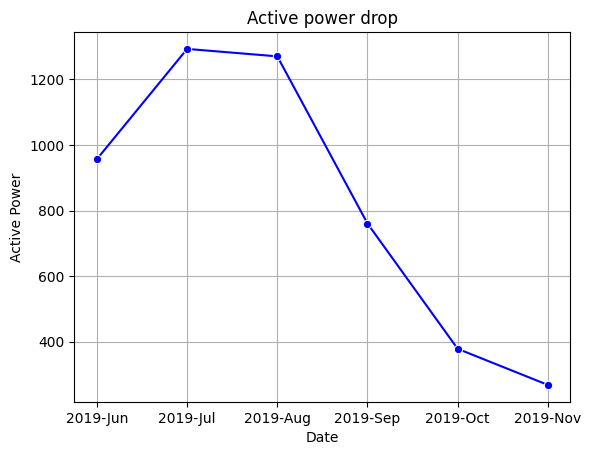

In [ ]:
plt.show(10,6)
sns.lineplot(data = df_2019_ap.iloc[5:11,:],x='Date',y='Active Power',color='b',marker='o')
plt.grid(True)
plt.title('Active power drop')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2019-Jan'),
  Text(1, 0, '2019-Feb'),
  Text(2, 0, '2019-Mar'),
  Text(3, 0, '2019-Apr'),
  Text(4, 0, '2019-May'),
  Text(5, 0, '2019-Jun'),
  Text(6, 0, '2019-Jul'),
  Text(7, 0, '2019-Aug'),
  Text(8, 0, '2019-Sep'),
  Text(9, 0, '2019-Oct'),
  Text(10, 0, '2019-Nov'),
  Text(11, 0, '2019-Dec')])

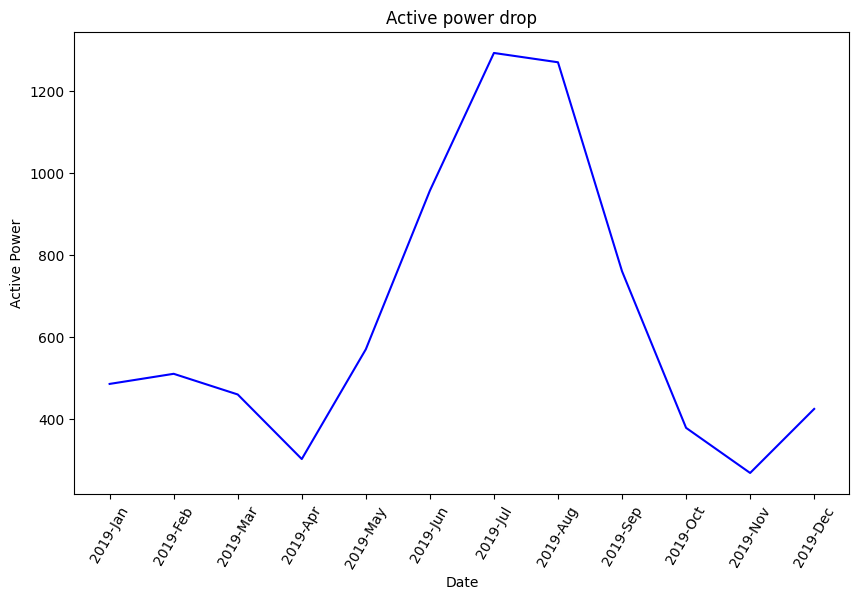

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data = df_2019_ap,x='Date',y='Active Power',color='b')
plt.title('Active power drop')
plt.xticks(rotation=60)

In [ ]:
blade_df = X_train[(X_train['WindSpeed']>=10.237) & (X_train['WindSpeed']<=13.35) & (X_train['BearingShaftTemperature']>=43.639)
& (X_train['BearingShaftTemperature']<=52.321)&(X_train['GearboxOilTemperature']>=62.73)&(X_train['GearboxOilTemperature']<=71.906)]

In [ ]:
blade_df

,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,ReactivePower,RotorRPM,WindSpeed
26229,47.717080,9.846891,10.361051,10.361051,79.045057,66.662191,1759.432330,116.638721,116.077502,40.003815,348.917745,15.784488,11.855509
35762,48.154663,10.076879,11.040861,11.040861,81.631939,69.827046,1763.603190,122.637960,121.974468,41.996185,348.968329,15.824923,12.451720
21765,48.603436,8.956919,9.393931,9.393931,79.975357,67.816587,1753.284900,117.269687,116.665652,40.457224,347.545249,15.731769,11.337960
31994,47.281885,9.015516,9.373627,9.373627,79.941796,67.785421,1753.888980,117.963371,117.376489,39.995852,348.582954,15.721023,10.761179
35543,48.593355,9.789299,10.054386,10.054386,79.341516,67.135904,1754.962130,109.685355,109.178780,39.660460,348.939609,15.735665,11.339199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26557,50.560587,10.103228,10.353017,10.353017,81.639114,70.439981,1754.500770,122.840580,122.175441,43.996185,348.171406,15.721195,12.705909
31551,46.432027,9.609594,9.602861,9.602861,79.772246,67.678183,1754.328490,116.222624,115.670832,38.378403,348.423801,15.734262,10.915334
18431,46.390422,6.643642,7.071182,7.071182,70.838595,67.416114,1755.295433,119.188927,118.602657,39.148447,349.026499,15.744794,10.665852
25658,48.259505,10.944372,11.220828,11.220828,80.383991,68.346198,1748.055270,117.477420,116.924579,40.980033,346.801125,15.669910,12.469155


In [ ]:
new_df_bl = pd.merge(blade_df, data[['ActivePower']], left_index=True, right_index=True, how='left')
new_df_bl

,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,ReactivePower,RotorRPM,WindSpeed,ActivePower
26229,47.717080,9.846891,10.361051,10.361051,79.045057,66.662191,1759.432330,116.638721,116.077502,40.003815,348.917745,15.784488,11.855509,1717.359775
35762,48.154663,10.076879,11.040861,11.040861,81.631939,69.827046,1763.603190,122.637960,121.974468,41.996185,348.968329,15.824923,12.451720,1720.555360
21765,48.603436,8.956919,9.393931,9.393931,79.975357,67.816587,1753.284900,117.269687,116.665652,40.457224,347.545249,15.731769,11.337960,1721.053655
31994,47.281885,9.015516,9.373627,9.373627,79.941796,67.785421,1753.888980,117.963371,117.376489,39.995852,348.582954,15.721023,10.761179,1711.323085
35543,48.593355,9.789299,10.054386,10.054386,79.341516,67.135904,1754.962130,109.685355,109.178780,39.660460,348.939609,15.735665,11.339199,1720.549125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26557,50.560587,10.103228,10.353017,10.353017,81.639114,70.439981,1754.500770,122.840580,122.175441,43.996185,348.171406,15.721195,12.705909,1709.202610
31551,46.432027,9.609594,9.602861,9.602861,79.772246,67.678183,1754.328490,116.222624,115.670832,38.378403,348.423801,15.734262,10.915334,1719.423605
18431,46.390422,6.643642,7.071182,7.071182,70.838595,67.416114,1755.295433,119.188927,118.602657,39.148447,349.026499,15.744794,10.665852,1725.615129
25658,48.259505,10.944372,11.220828,11.220828,80.383991,68.346198,1748.055270,117.477420,116.924579,40.980033,346.801125,15.669910,12.469155,1721.443190


<Axes: >

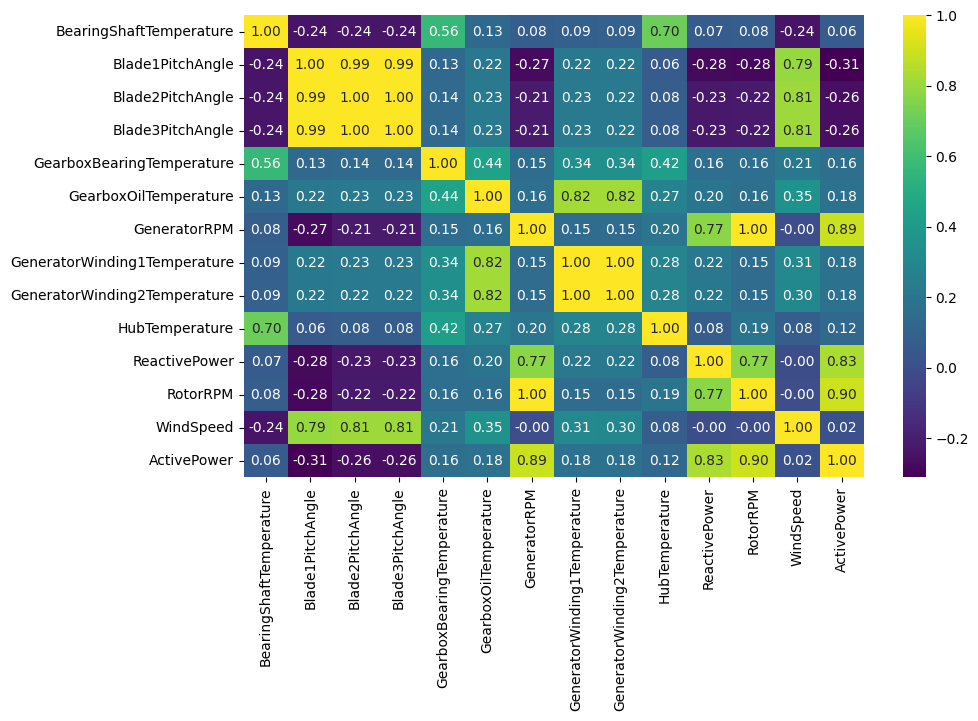

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(new_df_bl.corr(),annot=True,fmt='.2f',cmap='viridis')

In [ ]:
new_df_bl = new_df_bl [['BearingShaftTemperature','Blade1PitchAngle','Blade2PitchAngle','Blade3PitchAngle','WindSpeed','GearboxOilTemperature','ActivePower']]

In [ ]:
new_df_bl

,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,WindSpeed,GearboxOilTemperature,ActivePower
26229,47.717080,9.846891,10.361051,10.361051,11.855509,66.662191,1717.359775
35762,48.154663,10.076879,11.040861,11.040861,12.451720,69.827046,1720.555360
21765,48.603436,8.956919,9.393931,9.393931,11.337960,67.816587,1721.053655
31994,47.281885,9.015516,9.373627,9.373627,10.761179,67.785421,1711.323085
35543,48.593355,9.789299,10.054386,10.054386,11.339199,67.135904,1720.549125
...,...,...,...,...,...,...,...
26557,50.560587,10.103228,10.353017,10.353017,12.705909,70.439981,1709.202610
31551,46.432027,9.609594,9.602861,9.602861,10.915334,67.678183,1719.423605
18431,46.390422,6.643642,7.071182,7.071182,10.665852,67.416114,1725.615129
25658,48.259505,10.944372,11.220828,11.220828,12.469155,68.346198,1721.443190


In [ ]:
X_bl1 = new_df_bl.drop(['Blade1PitchAngle'],axis=1)
y_bl1 = new_df_bl['Blade1PitchAngle']
x_bl1_scaled = scaler.fit_transform(X_bl1)

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(x_bl1_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear'),
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history = model.fit(x_bl1_scaled,y_bl1,batch_size=16,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
112/112 [==============================] - 1s 4ms/step - loss: 90.5480 - mae: 9.0979 - val_loss: 43.0039 - val_mae: 6.2549
Epoch 2/50
112/112 [==============================] - 0s 3ms/step - loss: 12.2610 - mae: 2.7677 - val_loss: 4.5727 - val_mae: 1.7749
Epoch 3/50
112/112 [==============================] - 0s 2ms/step - loss: 3.6798 - mae: 1.5306 - val_loss: 2.7391 - val_mae: 1.3341
Epoch 4/50
112/112 [==============================] - 0s 2ms/step - loss: 2.2498 - mae: 1.1849 - val_loss: 1.5935 - val_mae: 1.0381
Epoch 5/50
112/112 [==============================] - 0s 2ms/step - loss: 1.3943 - mae: 0.9262 - val_loss: 0.9613 - val_mae: 0.7885
Epoch 6/50
112/112 [==============================] - 0s 2ms/step - loss: 0.9027 - mae: 0.7242 - val_loss: 0.6225 - val_mae: 0.6352
Epoch 7/50
112/112 [==============================] - 0s 2ms/step - loss: 0.5871 - mae: 0.5727 - val_loss: 0.4205 - val_mae: 0.5158
Epoch 8/50
112/112 [==============================] - 0s 2ms/step - loss:

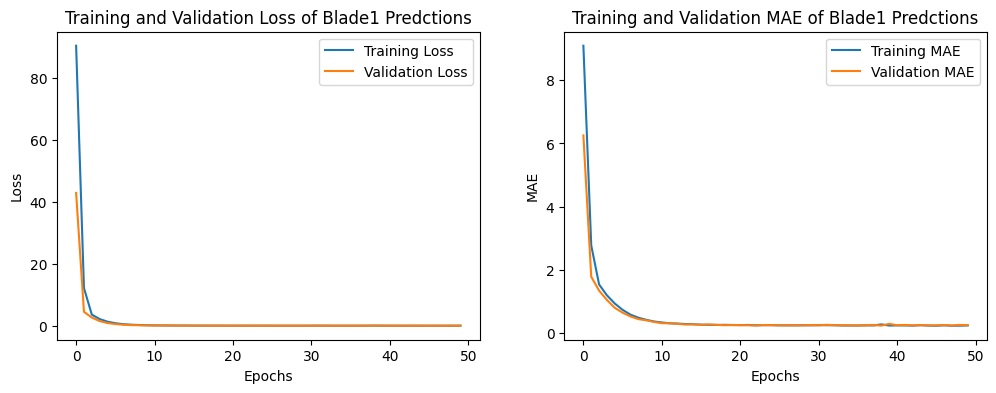

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Training and Validation Loss of Blade1 Predctions')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history.history['mae'], label='Training MAE')
ax[1].plot(history.history['val_mae'], label='Validation MAE')
ax[1].set_title('Training and Validation MAE of Blade1 Predctions')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MAE')
ax[1].legend()

plt.show()

In [ ]:
prediction_bl1 = model.predict(scaler.transform(X_bl1))

70/70 [==============================] - 0s 2ms/step


In [ ]:
mse = mean_squared_error(y_bl1, prediction_bl1)
mae = mean_absolute_error(y_bl1, prediction_bl1)
rmse = np.sqrt(mse)
r2 = r2_score(y_bl1, prediction_bl1)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.09635805585123153
Mean Absolute Error (MAE): 0.22926089838108837
Root Mean Squared Error (RMSE): 0.31041594007272166
R-squared (R2): 0.9854608294904135


In [ ]:
predicted_values = prediction_bl1[:, 0]
df_pred_bl1 = pd.DataFrame({'blade1pitchangle': predicted_values}, index=X_bl1.index)
df_bl1_new = pd.concat([X_bl1, df_pred_bl1], axis=1)
df_bl1_new

,BearingShaftTemperature,Blade2PitchAngle,Blade3PitchAngle,WindSpeed,GearboxOilTemperature,ActivePower,blade1pitchangle
26229,47.717080,10.361051,10.361051,11.855509,66.662191,1717.359775,9.924347
35762,48.154663,11.040861,11.040861,12.451720,69.827046,1720.555360,10.657091
21765,48.603436,9.393931,9.393931,11.337960,67.816587,1721.053655,9.117820
31994,47.281885,9.373627,9.373627,10.761179,67.785421,1711.323085,9.051563
35543,48.593355,10.054386,10.054386,11.339199,67.135904,1720.549125,9.745250
...,...,...,...,...,...,...,...
26557,50.560587,10.353017,10.353017,12.705909,70.439981,1709.202610,10.076951
31551,46.432027,9.602861,9.602861,10.915334,67.678183,1719.423605,9.148424
18431,46.390422,7.071182,7.071182,10.665852,67.416114,1725.615129,6.672018
25658,48.259505,11.220828,11.220828,12.469155,68.346198,1721.443190,10.946385


In [ ]:
df_bl1_new['blade1pitchangle'].describe()

count    2230.000000
mean       10.097451
std         2.641939
min         5.177100
25%         8.244831
50%         9.637536
75%        11.355969
max        47.225224
Name: blade1pitchangle, dtype: float64

In [ ]:
df_bl1_new[df_bl1_new['ActivePower'] < 500]

,BearingShaftTemperature,Blade2PitchAngle,Blade3PitchAngle,WindSpeed,GearboxOilTemperature,ActivePower,blade1pitchangle
31330,46.688038,41.024572,41.024572,12.126539,65.586869,303.639161,44.313274
26968,48.387901,44.764281,44.764281,10.419919,65.851995,384.087066,47.225224
16076,44.218130,10.026366,10.026366,10.312200,62.970150,0.000000,12.192811
14479,46.904818,10.026366,10.026366,11.432479,62.871621,199.818768,11.444875


In [ ]:
df_bl1_new['Date'] = data.loc[df_bl1_new.index, 'Date']
df_bl1_new

,BearingShaftTemperature,Blade2PitchAngle,Blade3PitchAngle,WindSpeed,GearboxOilTemperature,ActivePower,blade1pitchangle,Date
26229,47.717080,10.361051,10.361051,11.855509,66.662191,1717.359775,9.924347,2019-07-02
35762,48.154663,11.040861,11.040861,12.451720,69.827046,1720.555360,10.657091,2019-09-06
21765,48.603436,9.393931,9.393931,11.337960,67.816587,1721.053655,9.117820,2019-06-01
31994,47.281885,9.373627,9.373627,10.761179,67.785421,1711.323085,9.051563,2019-08-11
35543,48.593355,10.054386,10.054386,11.339199,67.135904,1720.549125,9.745250,2019-09-04
...,...,...,...,...,...,...,...,...
26557,50.560587,10.353017,10.353017,12.705909,70.439981,1709.202610,10.076951,2019-07-04
31551,46.432027,9.602861,9.602861,10.915334,67.678183,1719.423605,9.148424,2019-08-08
18431,46.390422,7.071182,7.071182,10.665852,67.416114,1725.615129,6.672018,2019-05-08
25658,48.259505,11.220828,11.220828,12.469155,68.346198,1721.443190,10.946385,2019-06-28


In [ ]:
df_bl1_new[df_bl1_new['ActivePower'] < 500][['Date','ActivePower','blade1pitchangle','Blade2PitchAngle','Blade3PitchAngle','WindSpeed']]

,Date,ActivePower,blade1pitchangle,Blade2PitchAngle,Blade3PitchAngle,WindSpeed
31330,2019-08-06,303.639161,44.313274,41.024572,41.024572,12.126539
26968,2019-07-07,384.087066,47.225224,44.764281,44.764281,10.419919
16076,2019-04-22,0.000000,12.192811,10.026366,10.026366,10.312200
14479,2019-04-11,199.818768,11.444875,10.026366,10.026366,11.432479


<Axes: xlabel='Blade3PitchAngle', ylabel='ActivePower'>

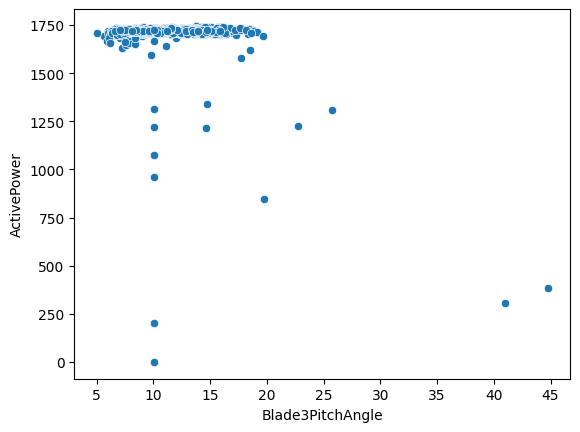

In [ ]:
sns.scatterplot(data=df_bl1_new,y='ActivePower',x='Blade3PitchAngle')

In [ ]:
X_bl2 = new_df_bl.drop(['Blade2PitchAngle'], axis=1)
y_bl2 = new_df_bl['Blade2PitchAngle']
x_bl2_scaled = scaler.fit_transform(X_bl2)

In [ ]:
model_bl2 = Sequential([
    Dense(32, activation='relu', input_shape=(x_bl2_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear'),
])

In [ ]:
model_bl2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history_bl2 = model_bl2.fit(x_bl2_scaled, y_bl2, batch_size=16, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
112/112 [==============================] - 2s 4ms/step - loss: 87.4190 - mae: 8.9485 - val_loss: 32.1164 - val_mae: 5.3204
Epoch 2/50
112/112 [==============================] - 0s 3ms/step - loss: 11.9026 - mae: 2.6735 - val_loss: 6.2235 - val_mae: 2.0668
Epoch 3/50
112/112 [==============================] - 0s 3ms/step - loss: 5.7557 - mae: 1.8646 - val_loss: 4.1003 - val_mae: 1.6417
Epoch 4/50
112/112 [==============================] - 0s 3ms/step - loss: 3.7669 - mae: 1.5027 - val_loss: 2.5953 - val_mae: 1.3256
Epoch 5/50
112/112 [==============================] - 0s 2ms/step - loss: 2.3823 - mae: 1.1961 - val_loss: 1.5785 - val_mae: 1.0211
Epoch 6/50
112/112 [==============================] - 0s 2ms/step - loss: 1.3971 - mae: 0.9058 - val_loss: 0.8285 - val_mae: 0.7387
Epoch 7/50
112/112 [==============================] - 0s 2ms/step - loss: 0.6835 - mae: 0.6207 - val_loss: 0.3927 - val_mae: 0.4994
Epoch 8/50
112/112 [==============================] - 0s 3ms/step - loss:

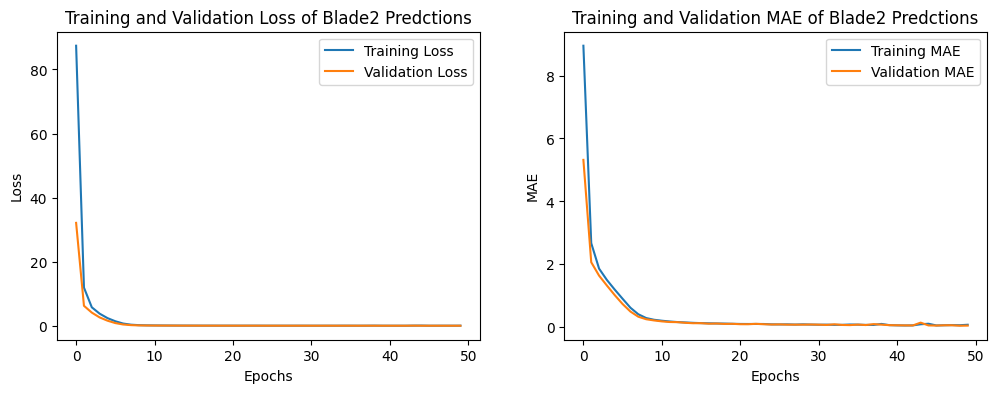

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history_bl2.history['loss'], label='Training Loss')
ax[0].plot(history_bl2.history['val_loss'], label='Validation Loss')
ax[0].set_title('Training and Validation Loss of Blade2 Predctions')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history_bl2.history['mae'], label='Training MAE')
ax[1].plot(history_bl2.history['val_mae'], label='Validation MAE')
ax[1].set_title('Training and Validation MAE of Blade2 Predctions')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MAE')
ax[1].legend()

plt.show()


In [ ]:
prediction_bl2 = model_bl2.predict(scaler.transform(X_bl2))
mse_bl2 = mean_squared_error(y_bl2, prediction_bl2)
mae_bl2 = mean_absolute_error(y_bl2, prediction_bl2)
rmse_bl2 = np.sqrt(mse_bl2)
r2_bl2 = r2_score(y_bl2, prediction_bl2)

print(f'Mean Squared Error (MSE) for Blade2PitchAngle: {mse_bl2}')
print(f'Mean Absolute Error (MAE) for Blade2PitchAngle: {mae_bl2}')
print(f'Root Mean Squared Error (RMSE) for Blade2PitchAngle: {rmse_bl2}')
print(f'R-squared (R2) for Blade2PitchAngle: {r2_bl2}')


70/70 [==============================] - 0s 1ms/step
Mean Squared Error (MSE) for Blade2PitchAngle: 0.007699429255487776
Mean Absolute Error (MAE) for Blade2PitchAngle: 0.05187868218085125
Root Mean Squared Error (RMSE) for Blade2PitchAngle: 0.08774639169497385
R-squared (R2) for Blade2PitchAngle: 0.9987847877104512


In [ ]:
predicted_values_bl2 = prediction_bl2[:, 0]
df_pred_bl2 = pd.DataFrame({'blade2PitchAngle': predicted_values_bl2}, index=X_bl2.index)
df_bl1_new.drop(['Blade2PitchAngle'],axis=1)

df_bl1_new = pd.concat([df_bl1_new, df_pred_bl2['blade2PitchAngle']], axis=1)

In [ ]:
df_bl1_new

,BearingShaftTemperature,Blade2PitchAngle,Blade3PitchAngle,WindSpeed,GearboxOilTemperature,ActivePower,blade1pitchangle,Date,blade2PitchAngle
26229,47.717080,10.361051,10.361051,11.855509,66.662191,1717.359775,9.924347,2019-07-02,10.194725
35762,48.154663,11.040861,11.040861,12.451720,69.827046,1720.555360,10.657091,2019-09-06,11.058722
21765,48.603436,9.393931,9.393931,11.337960,67.816587,1721.053655,9.117820,2019-06-01,9.392288
31994,47.281885,9.373627,9.373627,10.761179,67.785421,1711.323085,9.051563,2019-08-11,9.321733
35543,48.593355,10.054386,10.054386,11.339199,67.135904,1720.549125,9.745250,2019-09-04,9.955408
...,...,...,...,...,...,...,...,...,...
26557,50.560587,10.353017,10.353017,12.705909,70.439981,1709.202610,10.076951,2019-07-04,10.391520
31551,46.432027,9.602861,9.602861,10.915334,67.678183,1719.423605,9.148424,2019-08-08,9.562346
18431,46.390422,7.071182,7.071182,10.665852,67.416114,1725.615129,6.672018,2019-05-08,6.944640
25658,48.259505,11.220828,11.220828,12.469155,68.346198,1721.443190,10.946385,2019-06-28,11.195766


In [ ]:
X_bl3 = new_df_bl.drop(['Blade3PitchAngle'], axis=1)
y_bl3 = new_df_bl['Blade3PitchAngle']
x_bl3_scaled = scaler.fit_transform(X_bl3)

In [ ]:
model_bl3 = Sequential([
    Dense(32, activation='relu', input_shape=(x_bl3_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear'),
])

In [ ]:
model_bl3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history_bl3 = model_bl3.fit(x_bl3_scaled, y_bl3, batch_size=16, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
112/112 [==============================] - 2s 5ms/step - loss: 71.5750 - mae: 7.9359 - val_loss: 15.8385 - val_mae: 3.3132
Epoch 2/50
112/112 [==============================] - 0s 3ms/step - loss: 10.5670 - mae: 2.6444 - val_loss: 6.0001 - val_mae: 2.0426
Epoch 3/50
112/112 [==============================] - 0s 3ms/step - loss: 3.9556 - mae: 1.5983 - val_loss: 2.2506 - val_mae: 1.1946
Epoch 4/50
112/112 [==============================] - 0s 3ms/step - loss: 1.5393 - mae: 0.9640 - val_loss: 0.9500 - val_mae: 0.7770
Epoch 5/50
112/112 [==============================] - 0s 4ms/step - loss: 0.7840 - mae: 0.6604 - val_loss: 0.5109 - val_mae: 0.5536
Epoch 6/50
112/112 [==============================] - 0s 2ms/step - loss: 0.5080 - mae: 0.5186 - val_loss: 0.3613 - val_mae: 0.4604
Epoch 7/50
112/112 [==============================] - 0s 3ms/step - loss: 0.3297 - mae: 0.4103 - val_loss: 0.2339 - val_mae: 0.3578
Epoch 8/50
112/112 [==============================] - 0s 3ms/step - loss:

In [ ]:
prediction_bl3 = model_bl3.predict(scaler.transform(X_bl3))

mse_bl3 = mean_squared_error(y_bl3, prediction_bl3)
mae_bl3 = mean_absolute_error(y_bl3, prediction_bl3)
rmse_bl3 = np.sqrt(mse_bl3)
r2_bl3 = r2_score(y_bl3, prediction_bl3)

print(f'Mean Squared Error (MSE) for Blade2PitchAngle: {mse_bl3}')
print(f'Mean Absolute Error (MAE) for Blade2PitchAngle: {mae_bl3}')
print(f'Root Mean Squared Error (RMSE) for Blade2PitchAngle: {rmse_bl3}')
print(f'R-squared (R2) for Blade2PitchAngle: {r2_bl3}')


70/70 [==============================] - 0s 1ms/step
Mean Squared Error (MSE) for Blade2PitchAngle: 0.007246895377999601
Mean Absolute Error (MAE) for Blade2PitchAngle: 0.053369368167105975
Root Mean Squared Error (RMSE) for Blade2PitchAngle: 0.0851286989093549
R-squared (R2) for Blade2PitchAngle: 0.9988562118006157


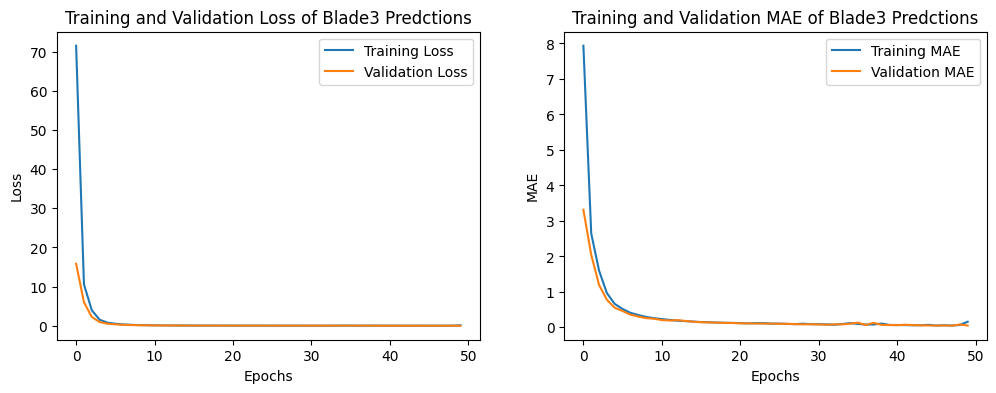

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(history_bl3.history['loss'], label='Training Loss')
ax[0].plot(history_bl3.history['val_loss'], label='Validation Loss')
ax[0].set_title('Training and Validation Loss of Blade3 Predctions')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(history_bl3.history['mae'], label='Training MAE')
ax[1].plot(history_bl3.history['val_mae'], label='Validation MAE')
ax[1].set_title('Training and Validation MAE of Blade3 Predctions')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MAE')
ax[1].legend()

plt.show()


In [ ]:
prediction_bl3 = model_bl3.predict(x_bl3_scaled)
predicted_values_bl3 = prediction_bl3[:, 0]
df_pred_bl3 = pd.DataFrame({'blade3PitchAngle': predicted_values_bl3}, index=X_bl3.index)
df_bl1_new = pd.concat([df_bl1_new, df_pred_bl3['blade3PitchAngle']], axis=1)
df_bl1_new

70/70 [==============================] - 0s 1ms/step


,BearingShaftTemperature,Blade2PitchAngle,Blade3PitchAngle,WindSpeed,GearboxOilTemperature,ActivePower,blade1pitchangle,Date,blade2PitchAngle,blade3PitchAngle
26229,47.717080,10.361051,10.361051,11.855509,66.662191,1717.359775,9.924347,2019-07-02,10.194725,10.327369
35762,48.154663,11.040861,11.040861,12.451720,69.827046,1720.555360,10.657091,2019-09-06,11.058722,11.069076
21765,48.603436,9.393931,9.393931,11.337960,67.816587,1721.053655,9.117820,2019-06-01,9.392288,9.428100
31994,47.281885,9.373627,9.373627,10.761179,67.785421,1711.323085,9.051563,2019-08-11,9.321733,9.347974
35543,48.593355,10.054386,10.054386,11.339199,67.135904,1720.549125,9.745250,2019-09-04,9.955408,10.046292
...,...,...,...,...,...,...,...,...,...,...
26557,50.560587,10.353017,10.353017,12.705909,70.439981,1709.202610,10.076951,2019-07-04,10.391520,10.398746
31551,46.432027,9.602861,9.602861,10.915334,67.678183,1719.423605,9.148424,2019-08-08,9.562346,9.636633
18431,46.390422,7.071182,7.071182,10.665852,67.416114,1725.615129,6.672018,2019-05-08,6.944640,7.018927
25658,48.259505,11.220828,11.220828,12.469155,68.346198,1721.443190,10.946385,2019-06-28,11.195766,11.230185


In [ ]:
df_bl1_new.drop(['Blade2PitchAngle','Blade3PitchAngle'],axis=1,inplace=True)

In [ ]:
df_bl1_new

,BearingShaftTemperature,WindSpeed,GearboxOilTemperature,ActivePower,blade1pitchangle,Date,blade2PitchAngle,blade3PitchAngle
26229,47.717080,11.855509,66.662191,1717.359775,9.924347,2019-07-02,10.194725,10.327369
35762,48.154663,12.451720,69.827046,1720.555360,10.657091,2019-09-06,11.058722,11.069076
21765,48.603436,11.337960,67.816587,1721.053655,9.117820,2019-06-01,9.392288,9.428100
31994,47.281885,10.761179,67.785421,1711.323085,9.051563,2019-08-11,9.321733,9.347974
35543,48.593355,11.339199,67.135904,1720.549125,9.745250,2019-09-04,9.955408,10.046292
...,...,...,...,...,...,...,...,...
26557,50.560587,12.705909,70.439981,1709.202610,10.076951,2019-07-04,10.391520,10.398746
31551,46.432027,10.915334,67.678183,1719.423605,9.148424,2019-08-08,9.562346,9.636633
18431,46.390422,10.665852,67.416114,1725.615129,6.672018,2019-05-08,6.944640,7.018927
25658,48.259505,12.469155,68.346198,1721.443190,10.946385,2019-06-28,11.195766,11.230185


In [ ]:
df_bl1_new['GearboxOilTemperature'].value_counts(bins=3)

(68.068, 70.707]    1348
(65.428, 68.068]     839
(62.779, 65.428]      43
Name: GearboxOilTemperature, dtype: int64

In [ ]:
temperature_ranges = [(62.779, 65.428), (65.428, 68.068), (68.068, 70.707)]
data['TemperatureRange'] = pd.cut(data['GearboxOilTemperature'], bins=[62.779, 65.428, 68.068, 70.707])
mean_blades_by_range = data.groupby('TemperatureRange')[['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle']].mean()
mean_blades_by_range

,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle
TemperatureRange,,,
"(62.779, 65.428]",3.242829,4.148428,4.148428
"(65.428, 68.068]",4.979825,5.462897,5.462897
"(68.068, 70.707]",8.299151,8.695656,8.695656


In [ ]:
mean_blades_by_range = mean_blades_by_range.reset_index()
mean_blades_melted = pd.melt(mean_blades_by_range, id_vars=['TemperatureRange'], var_name='Blade', value_name='MeanPitchAngle')

In [ ]:
mean_blades_melted['TemperatureRange'] = mean_blades_melted['TemperatureRange'].astype(str).str[1:-1]
mean_blades_melted['TemperatureRange'] = mean_blades_melted['TemperatureRange'].astype(str).str.replace(',','-')

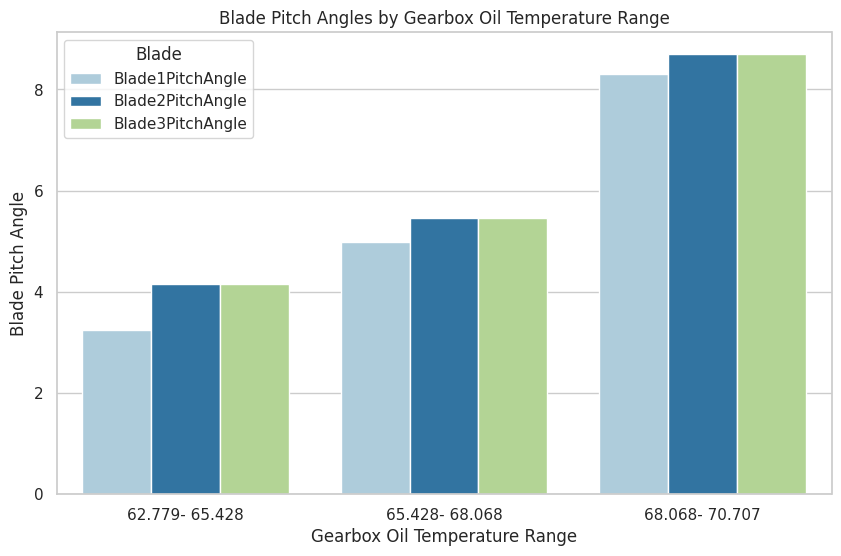

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='TemperatureRange', y='MeanPitchAngle', hue='Blade', data=mean_blades_melted, palette='Paired', alpha=1)
plt.title('Blade Pitch Angles by Gearbox Oil Temperature Range')
plt.xlabel('Gearbox Oil Temperature Range')
plt.ylabel('Blade Pitch Angle')
plt.legend(title='Blade')

plt.show()

In [ ]:
df_bl1_new['BearingShaftTemperature'].value_counts(bins=3)

(46.521, 49.364]                1251
(49.364, 52.207]                 707
(43.669000000000004, 46.521]     272
Name: BearingShaftTemperature, dtype: int64

In [ ]:
temperature_ranges = [(46.521, 49.364), (49.364, 52.207), (43.669, 46.521)]
data['TemperatureRange'] = pd.cut(data['BearingShaftTemperature'], bins=[43.669,46.521, 49.364, 52.207])
mean_blades_by_range = data.groupby('TemperatureRange')[['Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle']].mean()
mean_blades_by_range

,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle
TemperatureRange,,,
"(43.669, 46.521]",6.090106,6.889157,6.889157
"(46.521, 49.364]",4.928350,5.733988,5.733988
"(49.364, 52.207]",4.175598,4.819413,4.819413


In [ ]:
mean_blades_by_range = mean_blades_by_range.reset_index()
mean_blades_melted = pd.melt(mean_blades_by_range, id_vars=['TemperatureRange'], var_name='Blade', value_name='MeanPitchAngle')

In [ ]:
mean_blades_melted['TemperatureRange'] = mean_blades_melted['TemperatureRange'].astype(str).str[1:-1]
mean_blades_melted['TemperatureRange'] = mean_blades_melted['TemperatureRange'].astype(str).str.replace(',','-')

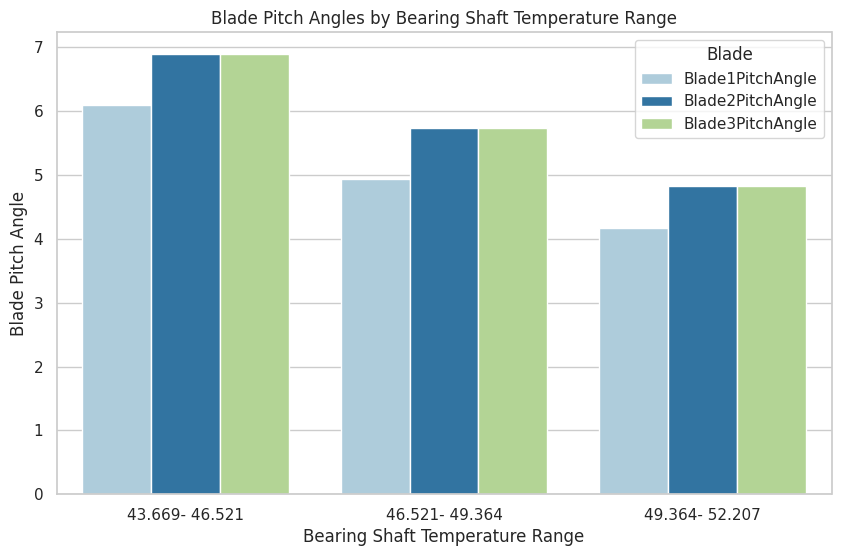

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='TemperatureRange', y='MeanPitchAngle', hue='Blade', data=mean_blades_melted, palette='Paired', alpha=1)
plt.title('Blade Pitch Angles by Bearing Shaft Temperature Range')
plt.xlabel('Bearing Shaft Temperature Range')
plt.ylabel('Blade Pitch Angle')
plt.legend(title='Blade')

plt.show()

In [ ]:
df_cr

,Date,Corrision Rate
0,2019-Jan,3.522579
1,2019-Feb,3.520577
2,2019-Mar,3.472441
3,2019-Apr,3.433019
4,2019-May,4.161085
5,2019-Jun,3.191437
6,2019-Jul,2.967761
7,2019-Aug,2.936633
8,2019-Sep,4.382629
9,2019-Oct,4.841887


In [ ]:
l=[]
for i in range(1,13):
  l.append(data[data['Date'].astype(str).str.contains(f'2019-{i:02d}')]['GeneratorRPM'].mean()-data[data['Date'].astype(str).str.contains(f'2019-{i:02d}')]['RotorRPM'].mean())

In [ ]:
for i in range(1,4):
  l.append(data[data['Date'].astype(str).str.contains(f'2020-{i:02d}')]['GeneratorRPM'].mean()-data[data['Date'].astype(str).str.contains(f'2020-{i:02d}')]['RotorRPM'].mean())

In [ ]:
l

[1049.9080970632795,
 1048.032885113665,
 962.9303637553166,
 800.9329776801543,
 1030.3173905333344,
 1291.6212995604772,
 1505.6225755666364,
 1501.388000025886,
 1139.7707222090116,
 883.8724650156662,
 856.2358384835095,
 920.2321012189017,
 1069.896582977733,
 1117.6320160604957,
 1013.44617286986]

In [ ]:
df_cr['Rpmdifference'] = l

In [ ]:
df_cr

,Date,Corrision Rate,Rpmdifference
0,2019-Jan,3.522579,1049.908097
1,2019-Feb,3.520577,1048.032885
2,2019-Mar,3.472441,962.930364
3,2019-Apr,3.433019,800.932978
4,2019-May,4.161085,1030.317391
5,2019-Jun,3.191437,1291.621300
6,2019-Jul,2.967761,1505.622576
7,2019-Aug,2.936633,1501.388000
8,2019-Sep,4.382629,1139.770722
9,2019-Oct,4.841887,883.872465


In [ ]:
new = df_cr.drop(df_cr[df_cr['Date'] == '2020-Jan'].index, axis=0)

Text(0.5, 0, 'Corrosion Rate')

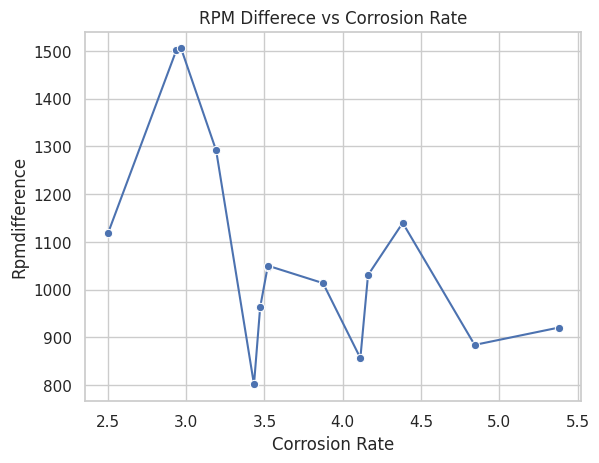

In [ ]:
sns.lineplot(data=new,x='Corrision Rate',y='Rpmdifference',marker='o')
plt.title('RPM Differece vs Corrosion Rate')
plt.xlabel('Corrosion Rate')

Temperature analysis

In [ ]:
data.columns

Index(['ActivePower', 'AmbientTemperatue', 'BearingShaftTemperature',
       'Blade1PitchAngle', 'Blade2PitchAngle', 'Blade3PitchAngle',
       'GearboxBearingTemperature', 'GearboxOilTemperature', 'GeneratorRPM',
       'GeneratorWinding1Temperature', 'GeneratorWinding2Temperature',
       'HubTemperature', 'MainBoxTemperature', 'NacellePosition',
       'ReactivePower', 'RotorRPM', 'TurbineStatus', 'WindDirection',
       'WindSpeed', 'Date and Time', 'WTG', 'Date', 'CorrosionRate',
       'TemperatureRange'],
      dtype='object')

In [ ]:
df_temp = data[(data['WindSpeed']>=10.237) & (data['WindSpeed']<=13.35)]
df_temp['Gearboxtemp'] = df_temp['GearboxBearingTemperature'] - df_temp['GearboxOilTemperature']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_temp['Gearboxtemp'].describe()

count    3182.000000
mean       10.241096
std         4.351413
min       -27.804134
25%        11.606368
50%        11.917650
75%        12.102464
max        18.263938
Name: Gearboxtemp, dtype: float64

In [ ]:
data.drop(['TemperatureRange'],axis=1,inplace=True)

In [ ]:
df_gear = data.copy()

In [ ]:
df_gear['Gearboxtemp'] = data['GearboxBearingTemperature'] - data['GearboxOilTemperature']

In [ ]:
df_gear['Gear_Status'] = pd.cut(df_gear['Gearboxtemp'],
                                bins=[-float('inf'), 12, 18, float('inf')],
                                labels=[1, 2, 3],
                                include_lowest=True)

In [ ]:
df_gear[df_gear['Gear_Status']==2]

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,...,RotorRPM,TurbineStatus,WindDirection,WindSpeed,Date and Time,WTG,Date,CorrosionRate,Gearboxtemp,Gear_Status
129,896.028252,19.676429,40.363879,9.211867,10.026366,10.026366,68.975110,56.907347,1407.131160,62.723914,...,12.612746,2.0,200.000000,7.474065,2019-01-01 21:30:00+00:00,G01,2019-01-01,3.964424,12.067763,2
506,1084.345368,26.926624,42.388269,10.332324,10.026366,10.026366,70.621491,58.614530,1499.362620,71.587507,...,13.430487,2.0,194.000000,7.432915,2019-01-04 12:20:00+00:00,G01,2019-01-04,4.269269,12.006960,2
508,1084.051093,26.672160,43.184139,9.992147,10.026366,10.026366,71.729195,59.396692,1498.547610,73.849515,...,13.450755,2.0,194.000000,7.978785,2019-01-04 12:40:00+00:00,G01,2019-01-04,4.246457,12.332503,2
509,949.232172,26.552614,43.330641,9.648291,10.026366,10.026366,71.361769,59.268405,1452.742480,73.874391,...,13.024800,2.0,200.000000,7.307105,2019-01-04 12:50:00+00:00,G01,2019-01-04,4.060507,12.093364,2
510,1117.241039,26.436728,43.385994,10.154417,10.026366,10.026366,71.712443,59.426701,1495.961675,74.011764,...,13.398101,2.0,200.763742,7.725950,2019-01-04 13:00:00+00:00,G01,2019-01-04,4.290207,12.285743,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62618,1654.487361,25.438945,48.887779,0.505482,0.906080,0.906080,71.313286,58.817194,1740.956133,88.331718,...,15.615358,2.0,169.000000,8.737572,2020-03-10 20:20:00+00:00,G01,2020-03-10,2.076350,12.496092,2
63295,1457.023459,31.135271,47.354146,-0.439175,-0.162036,-0.162036,70.906922,58.819506,1659.252589,84.108090,...,14.875679,2.0,132.000000,8.181494,2020-03-15 13:10:00+00:00,G01,2020-03-15,1.553029,12.087416,2
63930,1724.924417,28.815429,48.090133,3.803005,4.324112,4.324112,72.869289,60.602201,1756.644467,83.932818,...,15.736554,2.0,237.000000,9.896121,2020-03-19 23:00:00+00:00,G01,2020-03-19,3.187614,12.267088,2
63931,1714.708953,28.844975,48.400546,3.702786,4.185809,4.185809,73.435819,61.203618,1753.858144,89.967473,...,15.731594,2.0,237.000000,9.971742,2020-03-19 23:10:00+00:00,G01,2020-03-19,3.141464,12.232201,2


Predection of Gear status

In [ ]:
from keras.layers import Dropout

In [ ]:
X_gear = df_gear[['GearboxBearingTemperature','GearboxOilTemperature','Gearboxtemp']]
y_gear = df_gear['Gear_Status']

In [ ]:
x_gear_scaled = scaler.fit_transform(X_gear)

In [ ]:
model = Sequential([
    Dense(32,activation='relu',input_shape=(x_gear_scaled.shape[1],)),
    Dropout(0.3),
    Dense(3,activation='softmax')
])

In [ ]:
y_gear.value_counts()

1    59168
2     6350
3        2
Name: Gear_Status, dtype: int64

In [ ]:
y_gear_numeric = y_gear.cat.codes.astype(int) - 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DC=DecisionTreeClassifier()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_gear,y_gear_numeric,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((52416, 3), (13104, 3), (52416,), (13104,))

In [ ]:
DC.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = DC.predict(pd.concat([X_train,X_test],axis=0))

In [ ]:
df_gear['Gear_Status'].value_counts()

1    59168
2     6350
3        2
Name: Gear_Status, dtype: int64

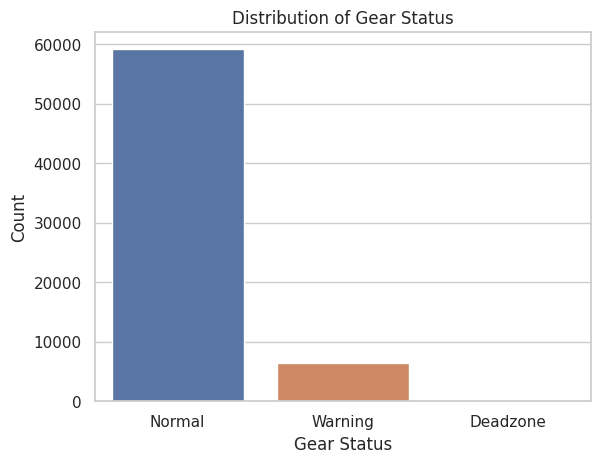

In [ ]:
df_gear['Gear_Status_Label'] = df_gear['Gear_Status'].map({1: 'Normal', 2: 'Warning', 3: 'Deadzone'})

gear_status_counts = df_gear['Gear_Status_Label'].value_counts()

sns.barplot(x=gear_status_counts.index, y=gear_status_counts.values)
plt.xlabel('Gear Status')
plt.ylabel('Count')
plt.title('Distribution of Gear Status')
plt.show()

In [ ]:
df_gear[df_gear['Gear_Status'] ==3][['Date','Gear_Status']]

,Date,Gear_Status
13300,2019-04-03,3
31263,2019-08-06,3


In [ ]:
df_bl1_new

,BearingShaftTemperature,WindSpeed,GearboxOilTemperature,ActivePower,blade1pitchangle,Date,blade2PitchAngle,blade3PitchAngle
26229,47.717080,11.855509,66.662191,1717.359775,10.138531,2019-07-02,10.315284,10.368282
35762,48.154663,12.451720,69.827046,1720.555360,10.672047,2019-09-06,11.040221,10.978559
21765,48.603436,11.337960,67.816587,1721.053655,9.044827,2019-06-01,9.327735,9.467226
31994,47.281885,10.761179,67.785421,1711.323085,8.966886,2019-08-11,9.408992,9.325064
35543,48.593355,11.339199,67.135904,1720.549125,9.720382,2019-09-04,10.095664,10.070756
...,...,...,...,...,...,...,...,...
26557,50.560587,12.705909,70.439981,1709.202610,10.058361,2019-07-04,10.310279,10.273261
31551,46.432027,10.915334,67.678183,1719.423605,9.388991,2019-08-08,9.625780,9.581905
18431,46.390422,10.665852,67.416114,1725.615129,6.903770,2019-05-08,7.071702,7.153108
25658,48.259505,12.469155,68.346198,1721.443190,10.879375,2019-06-28,11.204344,11.262018


In [ ]:
print(df_bl1_new['blade1pitchangle'].value_counts(bins=3))
print(df_bl1_new['blade2PitchAngle'].value_counts(bins=3))
print(df_bl1_new['blade3PitchAngle'].value_counts(bins=3))

(4.997, 17.759]     2213
(17.759, 30.481]      15
(30.481, 43.203]       2
Name: blade1pitchangle, dtype: int64
(5.205, 18.816]     2220
(18.816, 32.386]       8
(32.386, 45.955]       2
Name: blade2PitchAngle, dtype: int64
(5.044, 19.857]     2226
(19.857, 34.624]       2
(34.624, 49.392]       2
Name: blade3PitchAngle, dtype: int64


In [ ]:
df=df_bl1_new.copy()

In [ ]:
df_bl1_new[(df_bl1_new['blade1pitchangle'] >=4.99) & (df_bl1_new['blade1pitchangle']<17.759)]['ActivePower'].mean()

1716.3399144256582

In [ ]:
df.rename(columns={'blade1pitchangle':'blade1PitchAngle'},inplace=True)

In [ ]:
df

,BearingShaftTemperature,WindSpeed,GearboxOilTemperature,ActivePower,blade1PitchAngle,Date,blade2PitchAngle,blade3PitchAngle
26229,47.717080,11.855509,66.662191,1717.359775,10.138531,2019-07-02,10.315284,10.368282
35762,48.154663,12.451720,69.827046,1720.555360,10.672047,2019-09-06,11.040221,10.978559
21765,48.603436,11.337960,67.816587,1721.053655,9.044827,2019-06-01,9.327735,9.467226
31994,47.281885,10.761179,67.785421,1711.323085,8.966886,2019-08-11,9.408992,9.325064
35543,48.593355,11.339199,67.135904,1720.549125,9.720382,2019-09-04,10.095664,10.070756
...,...,...,...,...,...,...,...,...
26557,50.560587,12.705909,70.439981,1709.202610,10.058361,2019-07-04,10.310279,10.273261
31551,46.432027,10.915334,67.678183,1719.423605,9.388991,2019-08-08,9.625780,9.581905
18431,46.390422,10.665852,67.416114,1725.615129,6.903770,2019-05-08,7.071702,7.153108
25658,48.259505,12.469155,68.346198,1721.443190,10.879375,2019-06-28,11.204344,11.262018


In [ ]:
bins_blade1 = [4.997, 17.759, 30.481, 50]
bins_blade2 = [5.205, 18.816, 32.386, 50]
bins_blade3 = [5.044, 19.857, 34.624, 50]

# Create a new DataFrame to store the results
result_df = pd.DataFrame(columns=['blade', 'range_start', 'range_end', 'mean_ActivePower'])

# Iterate over blades and bins
for blade, bins in zip(['blade1', 'blade2', 'blade3'], [bins_blade1, bins_blade2, bins_blade3]):
    for i in range(len(bins) - 1):
        range_start, range_end = bins[i], bins[i+1]
        mask = (df[f'{blade}PitchAngle'] >= range_start) & (df[f'{blade}PitchAngle'] < range_end)
        mean_power = df[mask]['ActivePower'].mean()

        # Append the result to the new DataFrame
        result_df = result_df.append({
            'blade': blade,
            'range_start': range_start,
            'range_end': range_end,
            'mean_ActivePower': mean_power
        }, ignore_index=True)

# Display the result DataFrame
result_df

,blade,range_start,range_end,mean_ActivePower
0,blade1,4.997,17.759,1716.339914
1,blade1,17.759,30.481,1590.825290
2,blade1,30.481,50.000,343.863113
3,blade2,5.205,18.816,1716.297160
4,blade2,18.816,32.386,1492.864448
5,blade2,32.386,50.000,343.863113
6,blade3,5.044,19.857,1715.897201
7,blade3,19.857,34.624,1267.720313
8,blade3,34.624,50.000,343.863113


In [ ]:
result_df['ranges'] = result_df['range_start'].astype(str) +"-"+result_df['range_end'].astype(str)

In [ ]:
result_df.drop(['range_start','range_end'],axis=1,inplace=True)

In [ ]:
result_df.rename(columns={'mean_ActivePower':'Active Power'},inplace=True)

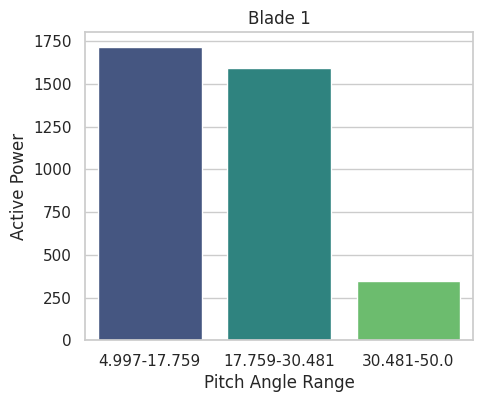

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(x='ranges', y='Active Power', data=result_df[result_df['blade'] == 'blade1'], palette='viridis')
plt.title('Blade 1')
plt.xlabel('Pitch Angle Range')
plt.ylabel('Active Power')
plt.show()

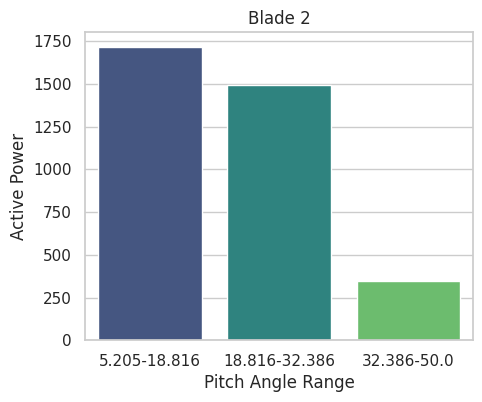

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(x='ranges', y='Active Power', data=result_df[result_df['blade'] == 'blade2'], palette='viridis')
plt.title('Blade 2')
plt.xlabel('Pitch Angle Range')
plt.ylabel('Active Power')
plt.show()

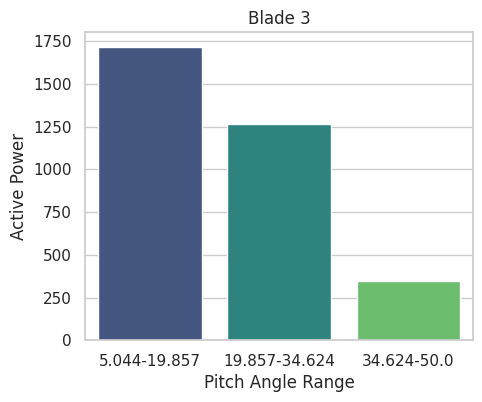

In [ ]:
plt.figure(figsize=(5, 4))
sns.barplot(x='ranges', y='Active Power', data=result_df[result_df['blade'] == 'blade3'], palette='viridis')
plt.title('Blade 3')
plt.xlabel('Pitch Angle Range')
plt.ylabel('Active Power')
plt.show()